# ARMA Models

This lesson combines Autoregressive (AR) and Moving Average (MA) components into ARMA models. An ARMA(p,q) model uses both past values and past forecast errors.

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  150
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -127.632
Date:                Fri, 28 Mar 2025   AIC                            265.264
Time:                        01:08:47   BIC                            280.317
Sample:                    01-01-2020   HQIC                           271.380
                         - 05-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1472      0.379      0.389      0.698      -0.595       0.890
ar.L1          0.8941      0.125      7.135      0.000       0.649       1.140
ar.L2          0.0653      0.107      0.609      0.5

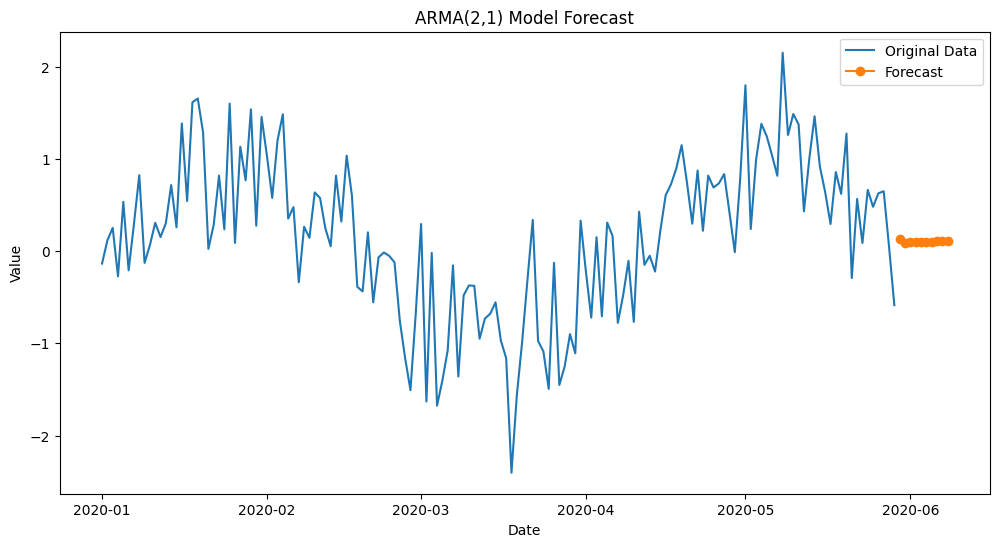

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

# Generate synthetic time series data
np.random.seed(41)
dates = pd.date_range(start='2020-01-01', periods=150, freq='D')
data = np.sin(np.linspace(0, 3 * np.pi, 150)) + np.random.normal(0, 0.5, 150)
ts_df = pd.DataFrame({'Date': dates, 'Value': data}).set_index('Date').asfreq('D')

# Fit an ARMA(2,1) model (using ARIMA with order (2,0,1))
model = ARIMA(ts_df['Value'], order=(2, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast the next 10 steps
forecast = model_fit.forecast(steps=10)
print('\nForecast:')
print(forecast)

# Plot the original data and forecast
plt.figure(figsize=(12,6))
plt.plot(ts_df, label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', marker='o')
plt.title('ARMA(2,1) Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Conclusion

The ARMA model successfully integrates both AR and MA components, offering a flexible approach for time series forecasting.